In [ ]:
%pip install matplotlib torchinfo gdown -U

# Pretrained Model

-   미리 학습된 모델.
-   **Pretrained model을 이용해 현재 문제를 해결한다.**
    -   새로 모델을 정의 하고 학습시키는 것 보다 Pretrained 모델을 사용해 모델을 정의하면 훨씬 좋은 성능의 모델을 만들 수 있다.
-   **Pretrain model을 사용하는 방식**
    -   제로샷 전이학습(Zero shot transfer learning)
        -   추가 학습없어 Pretrained 모델을 해결하려는 문제에 그대로 사용한다.
    -   전이학습 (Transfer learning)
        -   Pretrained 모델의 일부분을 재학습 시킨다. 주로 출력 Layer를 학습시킨다.
    -   미세조정 (Fine tuning)
        -   Pretrained 모델의 파라미터를 초기 파라미터로 사용하여 Custom Dataset으로 학습을 진행하여 모델의 모든 파라미터를 업데이트 시킨다.


## Pytorch에서 제공하는 Pretrained Model

-   분야별 라이브러리에서 제공
    -   torchvision: https://pytorch.org/vision/stable/models.html
-   torch hub 를 이용해 모델과 학습된 parameter를 사용할 수 있다.
    -   https://pytorch.org/hub/
-   이외에도 많은 모델과 학습된 paramter가 인터넷상에 공개되 있다.
    -   딥러닝 모델기반 application을 개발 할 때는 대부분 Transfer Learning을 한다.
    -   다양한 분야에서 연구된 많은 딥러닝 모델들이 구현되어 공개 되어 있으며 학습된 Parameter들도 제공되고 있다.
    -   [paperswithcode](https://paperswithcode.com/)에서 State Of The Art(SOTA) 논문들과 그 구현된 모델을 확인할 수 있다.

> **State Of The Art(SOTA)**: 특정 시점에 특정 분야에서 가장 성능이 좋은 모델을 말한다.


## VGGNet Pretrained 모델을 이용해 이미지 분류

-   Pytorch가 제공하는 VGG 모델은 ImageNet dataset으로 사전 학습 시킨 모델로 그 학습된 parameter를 제공한다.
    -   120만장의 trainset, 1000개의 class로 구성된 데이터셋.
    -   Output으로 1000개의 카테고리에 대한 확률을 출력한다.


In [ ]:
# ImageNet 1000개의 class 목록
%pip install wget

import wget
url = 'https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
imagenet_filepath = wget.download(url) # url의 파일을 다운로드.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9713 sha256=6fe180b50ca1580f4f9e4b9754a02ca38f06afe216b3e686acbd8bac2b034990
  Stored in directory: c:\users\playdata\appdata\local\pip\cache\wheels\01\46\3b\e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'wget' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'wget'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [ ]:
imagenet_filepath

'imagenet1000_clsidx_to_labels.txt'

In [ ]:
eval("1 + 1")

2

In [ ]:
import ast
with open("imagenet1000_clsidx_to_labels.txt", "rt") as fr:
    index_to_class = ast.literal_eval(fr.read())  # dictionary로 변환.
print(type(index_to_class), len(index_to_class))

<class 'dict'> 1000


In [ ]:
for key, value in list(index_to_class.items())[:5]:
    print(key, value)

0 tench, Tinca tinca
1 goldfish, Carassius auratus
2 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
3 tiger shark, Galeocerdo cuvieri
4 hammerhead, hammerhead shark


In [ ]:
index_to_class[3]

'tiger shark, Galeocerdo cuvieri'

### Pretrained Model Load 및 추론

In [ ]:
import torch
from torchvision import models, transforms  # torchvision.models: Pretrained 모델들을 제공.
from torchinfo import summary

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cpu


In [ ]:
## Pretrained 모델 Loading
load_model = models.vgg16(
    weights=models.VGG16_Weights.DEFAULT # 학습된 weight(parameter) 도 같이 load
)

In [ ]:
load_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
summary(load_model, (1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

<class 'PIL.JpegImagePlugin.JpegImageFile'>


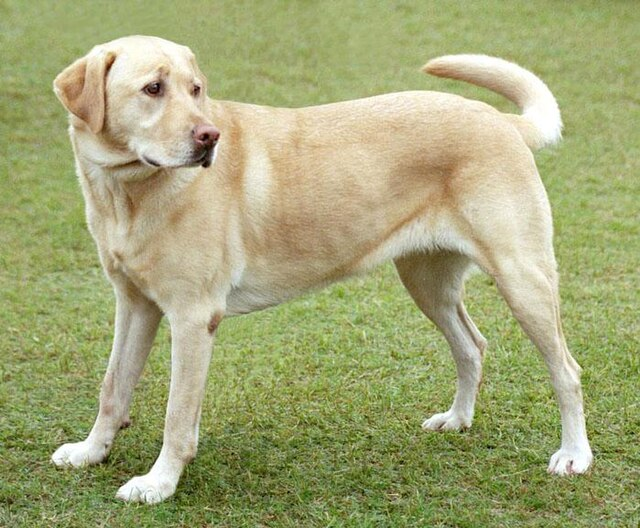

In [ ]:
# 추론할 이미지 다운로드
import requests
from io import BytesIO
from PIL import Image

img_url = 'https://cdn.download.ams.birds.cornell.edu/api/v1/asset/169231441/1800'
img_url = 'https://blogs.ifas.ufl.edu/news/files/2021/10/anole-FB.jpg'
img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/YellowLabradorLooking_new.jpg/640px-YellowLabradorLooking_new.jpg'

res = requests.get(img_url)
# res.content # binary data
# BytesIO() -> binary data(file)을 bytes 타입으로 변환.

test_img = Image.open(BytesIO(res.content)) # res: http 응답정보. res.content: 다운받은 binary 파일
print(type(test_img))
test_img

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])
input_tensor = transform(test_img).unsqueeze(0)
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [ ]:
load_model = load_model.to(device)
input_tensor = input_tensor.to(device)

load_model.eval()
with torch.no_grad():
    pred = load_model(input_tensor)

In [ ]:
pred.shape

torch.Size([1, 1000])

In [ ]:
pred.max(dim=-1)

torch.return_types.max(
values=tensor([12.4530]),
indices=tensor([208]))

In [ ]:
pred = torch.nn.Softmax(dim=-1)(pred) # logit -> 확률값
pred_cls = pred.max(dim=-1).indices[0] # class -> max값이 있는 index
pred_proba = pred.max(dim=-1).values[0]# 확률값

In [ ]:
pred.sum()
pred_cls, pred_proba

(tensor(208), tensor(0.3269))

In [ ]:
print(pred_proba)
print(pred_cls, index_to_class[pred_cls.item()])

tensor(0.3269)
tensor(208) Labrador retriever


# Transfer learning (전이학습)

-   사전에 학습된 신경망의 구조와 파라미터를 재사용해서 새로운 모델(우리가 만드는 모델)의 시작점으로 삼고 해결하려는 문제를 위해 다시 학습시킨다.
-   전이 학습을 통해 다음을 해결할 수 있다.
    1. 데이터 부족문제
        - 딥러닝은 대용량의 학습데이터가 필요하다.
        - 충분한 데이터를 수집하는 것은 항상 어렵다.
    2. 과다한 계산량
        - 신경망 학습에는 엄청난 양의 계산 자원이 필요하다.


![transfer_learning01](figures/09_transfer_01.png)


-   미리 학습된(pre-trained) Model을 이용하여 모델을 구성한 뒤 현재 하려는 예측 문제를 해결한다.
-   보통 Pretrained Model에서 Feature Extraction 부분을 사용한다.
    -   Computer Vision 문제의 경우 Bottom 쪽의 Convolution Layer(Feature Extractor)들은 이미지에 나타나는 일반적인 특성을 추출하므로 **다른 대상을 가지고 학습했다고 하더라도 재사용할 수 있다.**
    -   Top 부분 Layer 부분은 특히 출력 Layer의 경우 대상 데이터셋의 목적에 맞게 변경 해야 하므로 재사용할 수 없다.


![transfer_learning02](figures/09_transfer_02.png)

> **Frozon**: Training시 parameter가 update 되지 않도록 하는 것을 말한다.


### Feature extraction 재사용

-   Pretrained Model에서 Feature Extractor 만 가져오고 추론기(Fully connected layer)만 새로 정의한 뒤 그 둘을 합쳐서 모델을 만든다.
-   학습시 직접 구성한 추론기만 학습되도록 한다.
    -   Feature Extractor는 추론을 위한 Feature 추출을 하는 역할만 하고 그 parameter(weight)가 학습되지 않도록 한다.
-   모델/레이어의 parameter trainable 여부 속성 변경
    -   model/layer 의 `parameters()` 메소드를 이용해 weight와 bias를 조회한 뒤 `requires_grad` 속성을 `False`로 변경한다.

#### Backbone, Base network

-   전체 네트워크에서 Feature Extraction의 역할을 담당하는 부분을 Backbone/Base network라고 한다.
-   추론을 담당하는 layer block은 Head Network 이라고 한다.


## Fine-tuning(미세조정)

-   Transfer Learning을 위한 Pretrained 모델을 내가 학습시켜야 하는 데이터셋(Custom Dataset)으로 **재학습**시키는 것을 fine tuning 이라고 한다.
-   주어진 문제에 더 적합하도록 Feature Extractor의 가중치들도 조정 한다.


### Fine tuning 전략

![transfer02](figures/09_transfer_03.png)

-   **세 전략 모두 추론기는 trainable로 한다.**


**<span style='font-size:1.2em'>1. 전체 모델을 전부 학습시킨다.(1번)</span>**

-   Pretrained 모델의 weight는 Feature extraction 의 초기 weight 역할을 한다.
-   **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **낮은 경우** 적용.
-   학습에 시간이 많이 걸린다.

**<span style='font-size:1.2em'>2. Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습시킨다.<span>**

-   **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
-   **Train dataset의 양이 적고** Pretained 모델이 학습했던 dataset과 custom dataset의 class간의 유사성이 **낮은 경우** 적용

**<span style='font-size:1.2em'>3. Pretrained 모델 전체를 고정시키고 classifier layer들만 학습시ont3번)</span>**

-   **Train dataset의 양이 적고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.

> **Custom dataset:** 내가 학습시키고자 하는 dataset
> 1번 2번 전략을 Fine tuning 이라고 한다.

![fine tuning](figures/09_finetuning.png)


In [2]:
%pip install gdown -U

In [3]:
%pip install torchinfo

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim

from torchvision import models, datasets, transforms

from torchinfo import summary

from module.train import fit, test_multi_classification
from module.utils import plot_fit_result

import os
from zipfile import ZipFile


import gdown

device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
os.makedirs("data", exist_ok=True)


In [6]:
# download
url = "https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV"
path = r"data/cats_and_dogs_small.zip" # 다운 받은 공유파일을 저장할 경로.
gdown.download(url, path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV
From (redirected): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV&confirm=t&uuid=e04cee8c-99c6-49d0-8cbc-c8e8774eaccc
To: /content/data/cats_and_dogs_small.zip
100%|██████████| 90.8M/90.8M [00:01<00:00, 59.5MB/s]


'data/cats_and_dogs_small.zip'

In [7]:
# 압축 풀기
os.makedirs("data", exist_ok=True)
target_path = 'data/cats_and_dogs'
with ZipFile(path) as zf:
    zf.extractall(target_path)

## Dataset, DataLoader

In [8]:
target_path = 'data/cats_and_dogs'
BATCH_SIZE = 64
EPOCH = 10
LEARNING_RATE = 0.001

In [9]:
# Image Augmentation(증강)+전처리 설정
train_transform = transforms.Compose([
    transforms.Resize((224, 224)), # resize
    transforms.ToTensor(),         # ndarray, Image -> Tensor, 0 ~ 1 정규화, channel first
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    # 채널별 평균, 표준편차설정. -> Standard Scaling 처리.(픽셀값-평균)/표준편차
    transforms.RandomHorizontalFlip(), # 좌우반전 -> 랜덤
    transforms.RandomVerticalFlip(),   # 상하반전 -> 랜덤
    transforms.RandomRotation(degrees=180) # 회전 -> 0 ~ 180도 사이에서 랜덤 각도만큼 회전
])
test_transform = transforms.Compose([
    transforms.Resize((224, 224)), #  resize
    transforms.ToTensor(),          # ndarray, Image -> Tensor, 0 ~ 1 정규화, channel first
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

In [ ]:
# Dataset 정의
# ImageFolder -> Local disk에서 Image 데이터를 읽어서 제공해주는 Dataset
#   생성 -> Dataset이 있는 디렉토리를 지정.
#   Dataset있는 디렉토리 구조
#     class이름(dir) - image들을 저장.
# class - dogs, cats => train set구성
# \train
#    |- \cats
#    |     |- 고양이 사진들
#    |- \dogs
#          |- 개 사진들

# ImageFolder 생성할 때 \train 디렉토리를 지정.
##   cats/dogs 디렉토리 이름이 class, 그 안의 파일들이 input data

In [10]:

train_set = datasets.ImageFolder(
    os.path.join(target_path, "train"), # Data들을 저장한 디렉토리.
    transform=train_transform
)
valid_set = datasets.ImageFolder(
    os.path.join(target_path, "validation"),
    transform=test_transform
)
test_set = datasets.ImageFolder(
    os.path.join(target_path, "test"),
    transform=test_transform
)

In [11]:
# class, class_name 확인
print(train_set.classes)
print(train_set.class_to_idx)

['cats', 'dogs']
{'cats': 0, 'dogs': 1}


In [12]:
os.cpu_count()

2

In [14]:
# DataLoader
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, drop_last=True,
                          num_workers=os.cpu_count()) # 데이터 불러오는 것 병렬처리.
valid_loader = DataLoader(valid_set, batch_size=BATCH_SIZE, num_workers=os.cpu_count())
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, num_workers=os.cpu_count())

In [15]:
# step 수
len(train_loader), len(test_loader), len(valid_loader)

(31, 16, 16)

0


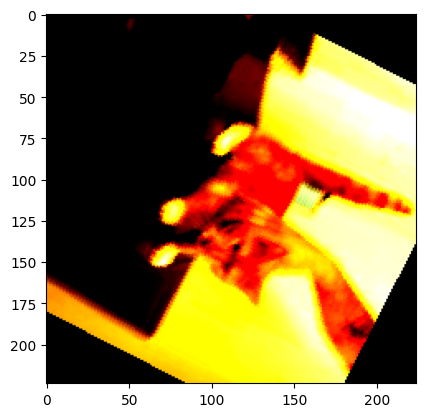

In [16]:
### Trainset Image 확인
import matplotlib.pyplot as plt
img = train_set[0][0]
img = img.permute(1, 2, 0)
img.shape
print(train_set[0][1])
plt.imshow(img)
plt.show()

## 모델 정의, 학습

In [17]:
# Transfer Learning - Backbone 모델: VGG16 + classifier(내것)
model = models.vgg16(models.VGG16_Weights.DEFAULT)
model

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 192MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [18]:
for a in model.parameters(): # Layer객체들의 weight/bias 순서대로  반환.
    print(a.shape, a.requires_grad)
    a.requires_grad = False
    print(a.requires_grad)
    break

torch.Size([64, 3, 3, 3]) True
False


In [19]:
# Frozon -> 파라미터들이 학습시 update 되지 않도록 변경.
for p in model.parameters():
    p.requires_grad = False

In [20]:
for p in model.parameters():
    print(p.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [21]:
import torch.nn as nn
# 분류기(classifier)를 내것으로 변경.
model.classifier = nn.Linear(in_features=25088, out_features=2)

In [22]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [23]:
summary(model, (1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 2]                    --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         (1,792)
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         (36,928)
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        (73,856)
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        (147,584)
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]    

## 학습

In [24]:
os.makedirs("saved_models", exist_ok=True)
save_model_path = "saved_models/cat_dog_model.pt"

model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

result = fit(train_loader, valid_loader, model, loss_fn, optimizer, EPOCH,
            save_best_model=True, save_model_path=save_model_path,
            device=device, mode="multi")

Epoch[1/10] - Train loss: 51.93553 Train Accucracy: 0.49200 || Validation Loss: 47.78927 Validation Accuracy: 0.50000
저장: 1 - 이전 : inf, 현재: 47.789270877838135
Epoch[2/10] - Train loss: 10.67582 Train Accucracy: 0.52000 || Validation Loss: 5.60560 Validation Accuracy: 0.66700
저장: 2 - 이전 : 47.789270877838135, 현재: 5.605599824571978
Epoch[3/10] - Train loss: 3.44863 Train Accucracy: 0.74400 || Validation Loss: 1.36984 Validation Accuracy: 0.90400
저장: 3 - 이전 : 5.605599824571978, 현재: 1.3698399165347865
Epoch[4/10] - Train loss: 2.07927 Train Accucracy: 0.81400 || Validation Loss: 0.58955 Validation Accuracy: 0.94800
저장: 4 - 이전 : 1.3698399165347865, 현재: 0.5895529221543248
Epoch[5/10] - Train loss: 2.16809 Train Accucracy: 0.80900 || Validation Loss: 0.56511 Validation Accuracy: 0.94800
저장: 5 - 이전 : 0.5895529221543248, 현재: 0.5651055603835173
Epoch[6/10] - Train loss: 2.87425 Train Accucracy: 0.76500 || Validation Loss: 0.65910 Validation Accuracy: 0.94300
Epoch[7/10] - Train loss: 3.35909 Trai

## 최종평가

In [25]:
load_model = torch.load(save_model_path, weights_only=False)

In [26]:
loss, acc = test_multi_classification(
    test_loader, load_model, loss_fn, device=device
)
loss, acc

(0.5476989949813316, 0.956)

In [27]:
import torch
from PIL import Image

def predict(image_path, model, transform, device):
    # "model로 image_path의 이미지를 추론한 결과를 반환."
    img = Image.open(image_path)  # 추론대상 이미지 loading
    input_data = transform(img)  # shape: (C, H, W)
    input_data = input_data.unsqueeze(dim=0) # (C, H, W) -> (1, C, H, W)
    input_data = input_data.to(device)

    # 추론
    model = model.to(device)
    model.eval()
    with torch.no_grad():
        pred = model(input_data)
        pred_proba = pred.softmax(dim=-1) # 확률값으로 변경.
        pred_label = pred_proba.argmax(dim=-1).item()  # Tensor([3]) -> 3
        pred_proba_max = pred_proba.max(dim=-1).values.item()
        class_name = "cat" if pred_label == 0 else "dog"
        return pred_label, class_name, pred_proba_max

In [28]:
predict("dog.jpg", load_model, test_transform, device)

(1, 'dog', 1.0)

In [29]:
predict("cat.jpg", load_model, test_transform, device)

(0, 'cat', 1.0)

In [31]:
predict("image.jpg", load_model, test_transform, device)

(1, 'dog', 1.0)

In [32]:
predict("dog3.webp", load_model, test_transform, device)

(1, 'dog', 1.0)